In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Reading csv file uploaded in dbfs to Pandas dataframe

In [3]:
pandas_df = pd.read_csv("/dbfs/FileStore/tables/Crimes___2001_to_present-9be1b.csv", header='infer')

In [4]:
df_all = pd.DataFrame(pandas_df)

In [5]:
df_all.head(2)

Out[ 45 ]: 
 ID Case Number Date Block IUCR \
0 10000092 HY189866 03/18/2015 07:44:00 PM 047XX W OHIO ST 041A 
1 10000094 HY190059 03/18/2015 11:00:00 PM 066XX S MARSHFIELD AVE 4625 

 Primary Type Description Location Description Arrest Domestic \
0 BATTERY AGGRAVATED: HANDGUN STREET False False 
1 OTHER OFFENSE PAROLE VIOLATION STREET True False 

 ... Ward Community Area FBI Code \
0 ... 28.0 25.0 04B 
1 ... 15.0 67.0 26 

 X Coordinate Y Coordinate Year Updated On Latitude \
0 1144606.0 1903566.0 2015 02/10/2018 03:50:01 PM 41.891399 
1 1166468.0 1860715.0 2015 02/10/2018 03:50:01 PM 41.773372 

 Longitude Location 
0 -87.744385 (41.891398861, -87.744384567) 
1 -87.665319 (41.773371528, -87.665319468) 

[2 rows x 22 columns]

Data dimension

In [7]:
df_all.shape

Out[ 46 ]: (6652608, 22)

count, mean, standard deviation and quantiles

In [9]:
df_all.describe()

Out[ 47 ]: 
 ID Beat District Ward Community Area \
count 6.652608e+06 6.652608e+06 6.652561e+06 6.037754e+06 6.036578e+06 
mean 6.151121e+06 1.192624e+03 1.130409e+01 2.266304e+01 3.760212e+01 
std 2.995583e+06 7.035298e+02 6.946135e+00 1.382642e+01 2.153192e+01 
min 6.340000e+02 1.110000e+02 1.000000e+00 1.000000e+00 0.000000e+00 
25% 3.396889e+06 6.220000e+02 6.000000e+00 1.000000e+01 2.300000e+01 
50% 6.134274e+06 1.111000e+03 1.000000e+01 2.200000e+01 3.200000e+01 
75% 8.731873e+06 1.731000e+03 1.700000e+01 3.400000e+01 5.800000e+01 
max 1.138622e+07 2.535000e+03 3.100000e+01 5.000000e+01 7.700000e+01 

 X Coordinate Y Coordinate Year Latitude Longitude 
count 6.593609e+06 6.593609e+06 6.652608e+06 6.593609e+06 6.593609e+06 
mean 1.164506e+06 1.885695e+06 2.008182e+03 4.184194e+01 -8.767184e+01 
std 1.719185e+04 3.273909e+04 4.908051e+00 9.009074e-02 6.220741e-02 
min 0.000000e+00 0.000000e+00 2.001000e+03 3.661945e+01 -9.168657e+01 
25% 1.152930e+06 1.859169e+06 2.004000e+03 4.176888e+01 -8.771390e+01 
50% 1.165969e+06 1.890470e+06 2.008000e+03 4.185502e+01 -8.766623e+01 
75% 1.176352e+06 1.909321e+06 2.012000e+03 4.190689e+01 -8.762842e+01 
max 1.205119e+06 1.951622e+06 2.018000e+03 4.202291e+01 -8.752453e+01

Data types of each column

In [11]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6652608 entries, 0 to 6652607
Data columns (total 22 columns):
ID int64
Case Number object
Date object
Block object
IUCR object
Primary Type object
Description object
Location Description object
Arrest bool
Domestic bool
Beat int64
District float64
Ward float64
Community Area float64
FBI Code object
X Coordinate float64
Y Coordinate float64
Year int64
Updated On object
Latitude float64
Longitude float64
Location object
dtypes: bool(2), float64(7), int64(3), object(10)
memory usage: 1.0+ GB

In [12]:
dta = df_all

In [13]:
df_all = df_all.fillna(" ")
data = df_all

In [14]:
data.isnull().sum()

Out[ 51 ]: 
ID 0
Case Number 0
Date 0
Block 0
IUCR 0
Primary Type 0
Description 0
Location Description 0
Arrest 0
Domestic 0
Beat 0
District 0
Ward 0
Community Area 0
FBI Code 0
X Coordinate 0
Y Coordinate 0
Year 0
Updated On 0
Latitude 0
Longitude 0
Location 0
dtype: int64

The above results show there are no null values and data has been corrected

Crime trends from 2001 to present

In [17]:
crime = data
crime.Date = pd.to_datetime(crime.Date, format='%m/%d/%Y %I:%M:%S %p')

In [18]:
crime['Year'] = crime.Date.apply(lambda x: x.year)
crime['Month'] = crime.Date.apply(lambda x: x.month)

In [19]:
crime_type = crime.groupby(['Year', 'Primary Type'])['ID'].count().reset_index(name = 'count')
crimes = pd.DataFrame(crime.groupby(['Month','Year']).size().sort_values(ascending=False).rename('Count').reset_index())
crimes.head()

Out[ 54 ]: 
 Month Year Count
0 7 2002 46013
1 7 2001 44691
2 8 2003 44265
3 8 2002 44210
4 8 2001 44032

In [20]:
crime_activity_plot = crimes.pivot_table(values='Count',index='Month',columns='Year')

Heatmap for Crime type for all the months

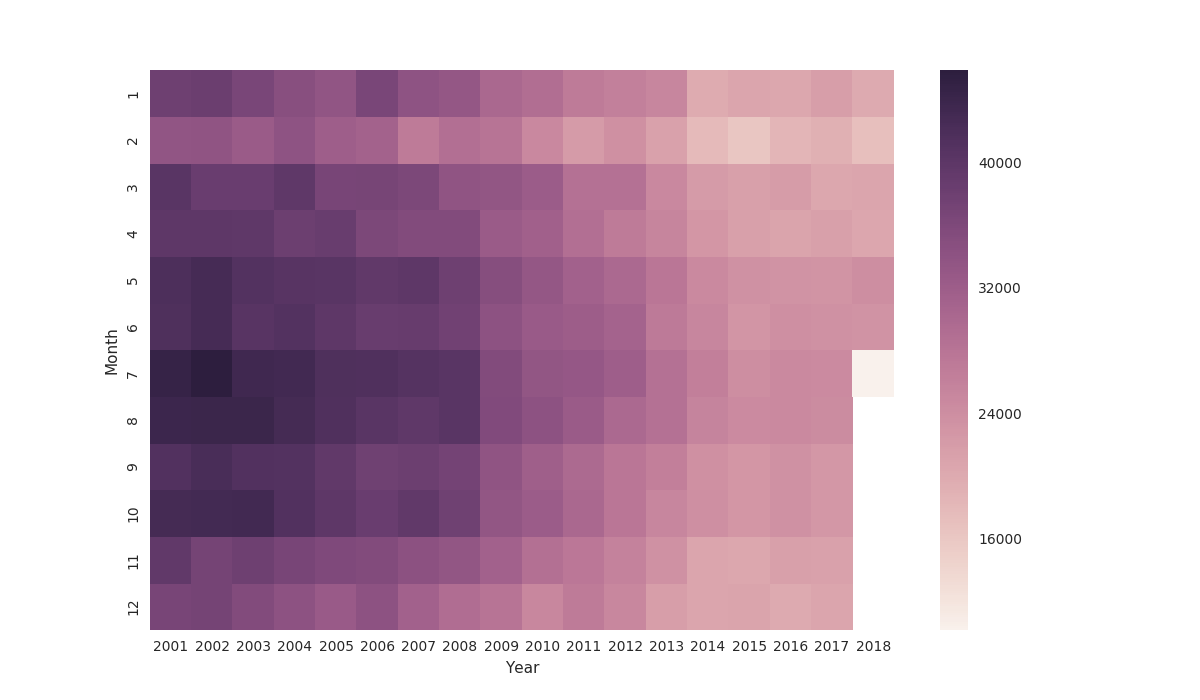

In [22]:
sns.plt.clf()
plt.figure(figsize=(12,7))
sns.heatmap(crime_activity_plot)
plt.show()
display()

From above heatmap we see that the crime rate is gradually decreasing. 

Also, most of the crime occurs between May to October. Frebruary has lowest crime rate. Winter vigilante!

Safest hours

In [25]:
# convert dates to pandas datetime format
crime.Date = pd.to_datetime(crime.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crime.index = pd.DatetimeIndex(crime.Date)

In [26]:
hour_by_location = data.pivot_table(values='ID', index='Location Description', columns=data.index.hour, aggfunc=np.size).fillna(0)
hour_by_type     = data.pivot_table(values='ID', index='Primary Type', columns=data.index.hour, aggfunc=np.size).fillna(0)
location_by_type = data.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)

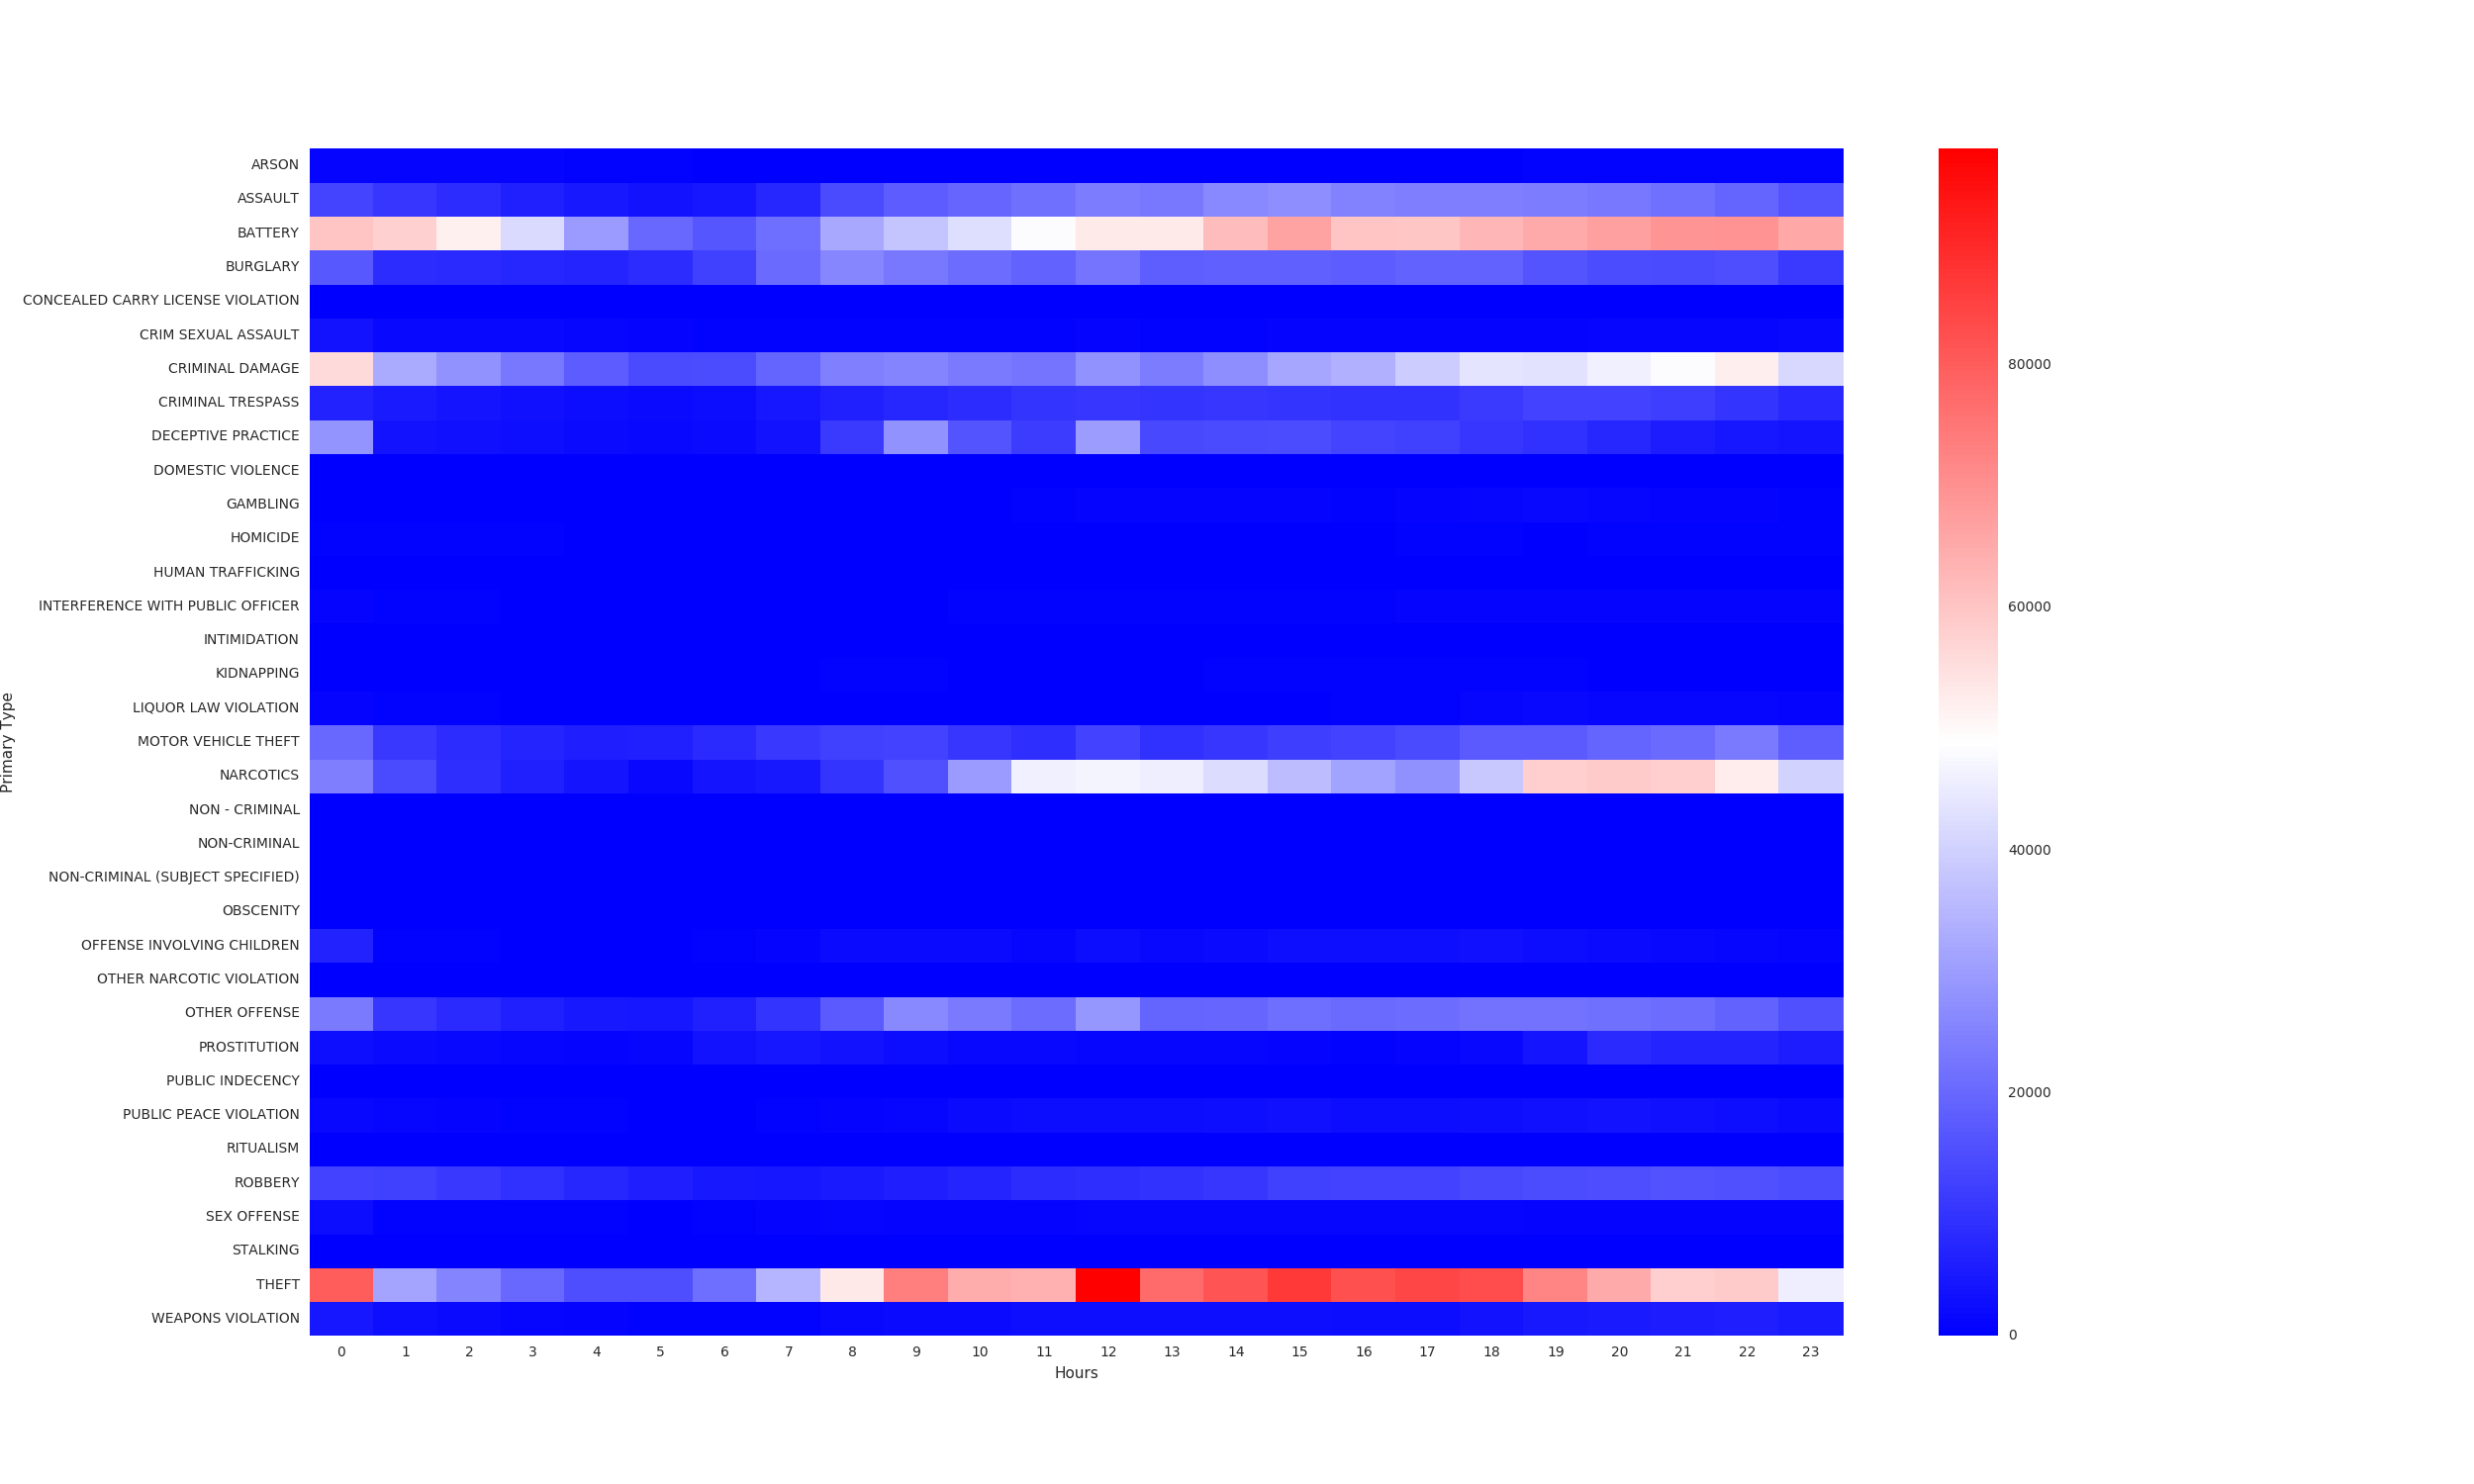

In [27]:
sns.plt.clf()
plt.figure(figsize=(25,15))
sns.heatmap(hour_by_type,cmap = 'bwr')
plt.xlabel("Hours")
plt.show()
display()

The above results show that only theft and battery are major crimes occuring in the city and rest are negligible. However, as there is large amount of data for these type, they are getting highlighted a lot.

We use renormalization for bring the different crime type to same level for sampling

In [29]:
#Z-score
hour_by_type_norm=hour_by_type.sub(hour_by_type.mean(axis=1), axis=0)
hour_by_type_norm=hour_by_type_norm.div( hour_by_type_norm.std(axis=1), axis=0 )

Heatmap after renormalization

Reference - https://python-graph-gallery.com/94-use-normalization-on-seaborn-heatmap/

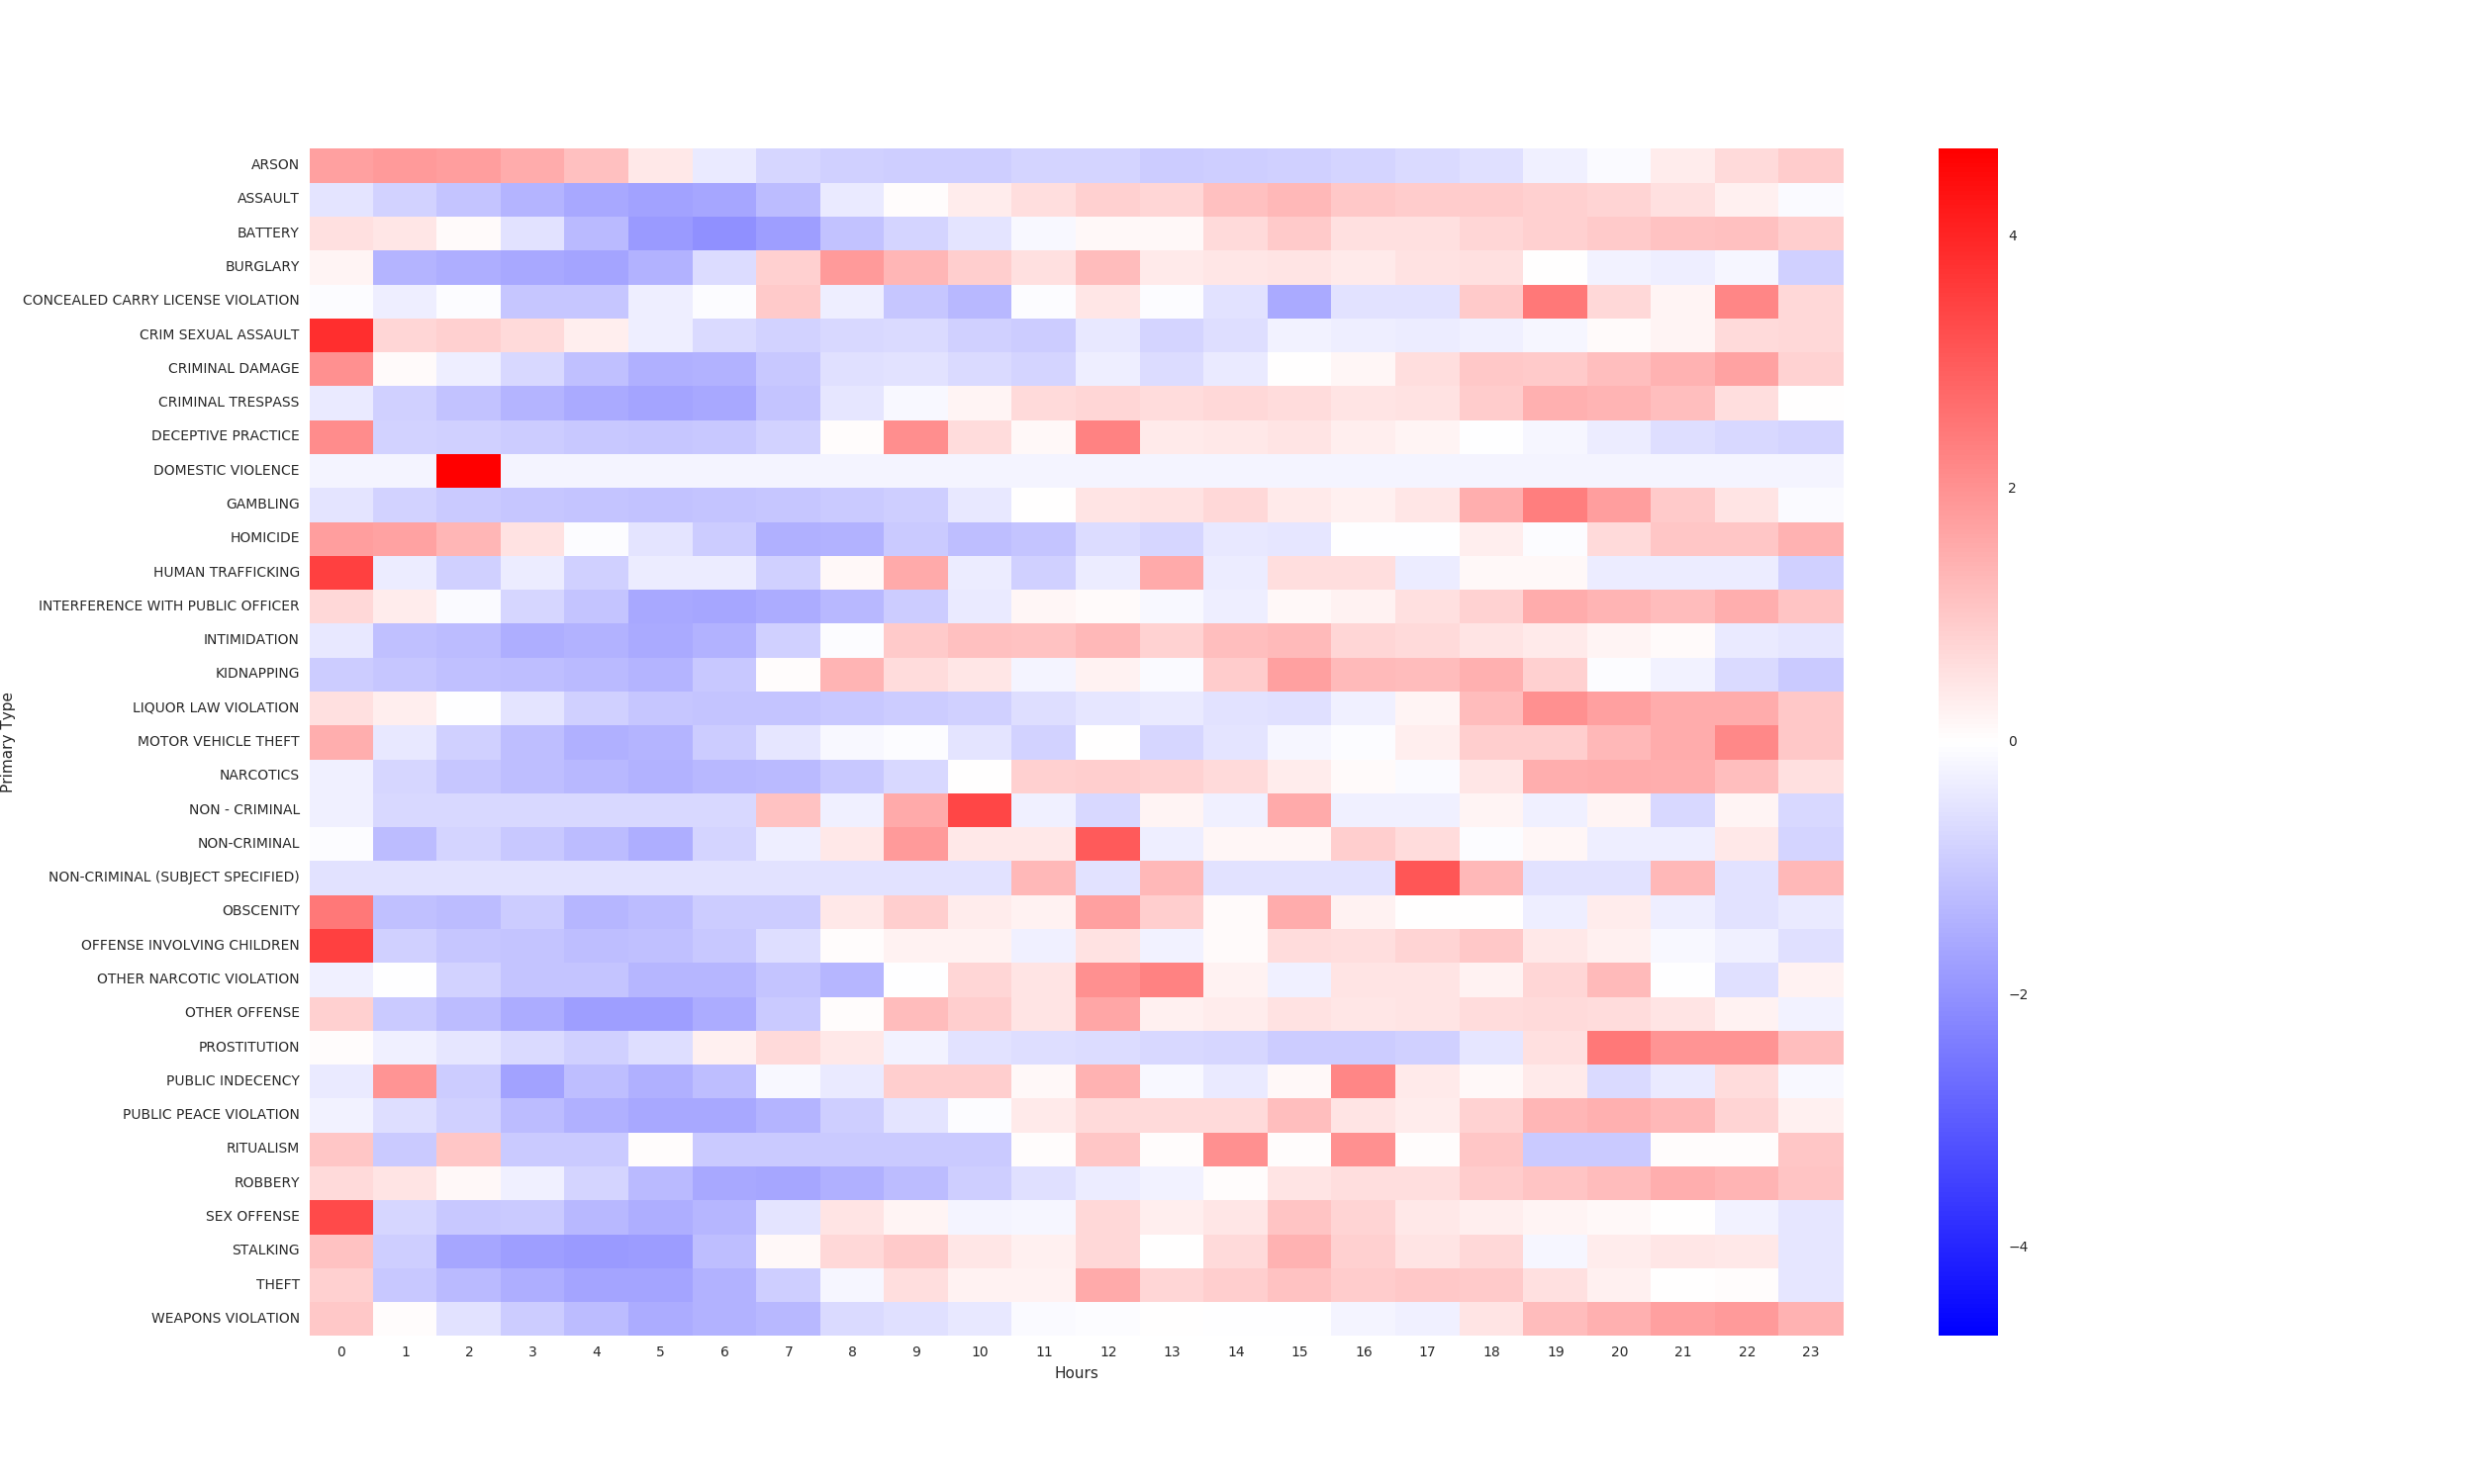

In [31]:
sns.plt.clf()
plt.figure(figsize=(25,15))
sns.heatmap(hour_by_type_norm,cmap = 'bwr')
plt.xlabel("Hours")
plt.show()
display()

As we can see, renormalization improves the results for better analysis

District wise plotting of crimes in Chicago

In [34]:
data.drop(labels=['Case Number','ID', 'Block', 'Ward', 'Community Area', 'FBI Code', 'Updated On',
                 'Latitude','Longitude', 'Beat'] , inplace=True, axis=1)

In [35]:
# convert dates to pandas datetime format
data.Date = pd.to_datetime(data.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
data.index = pd.DatetimeIndex(data.Date)

In [36]:
data = data.sort_values(by = ['District'])
data.groupby('Primary Type').size().sort_values(ascending=False)

Out[ 64 ]: 
Primary Type
THEFT 1394371
BATTERY 1214761
CRIMINAL DAMAGE 761704
NARCOTICS 706286
OTHER OFFENSE 412797
ASSAULT 411405
BURGLARY 383734
MOTOR VEHICLE THEFT 310791
DECEPTIVE PRACTICE 255487
ROBBERY 252284
CRIMINAL TRESPASS 191049
WEAPONS VIOLATION 68712
PROSTITUTION 68058
PUBLIC PEACE VIOLATION 47327
OFFENSE INVOLVING CHILDREN 44523
CRIM SEXUAL ASSAULT 26427
SEX OFFENSE 24608
INTERFERENCE WITH PUBLIC OFFICER 14694
GAMBLING 14327
LIQUOR LAW VIOLATION 13960
ARSON 11014
HOMICIDE 9197
KIDNAPPING 6615
INTIMIDATION 3861
STALKING 3309
OBSCENITY 546
CONCEALED CARRY LICENSE VIOLATION 220
PUBLIC INDECENCY 157
NON-CRIMINAL 150
OTHER NARCOTIC VIOLATION 123
HUMAN TRAFFICKING 42
NON - CRIMINAL 38
RITUALISM 23
NON-CRIMINAL (SUBJECT SPECIFIED) 7
DOMESTIC VIOLENCE 1
dtype: int64

In [37]:
data[['X Coordinate', 'Y Coordinate']] = data[['X Coordinate', 'Y Coordinate']].replace(0, " ")

data['X Coordinate'] = data[['X Coordinate']].convert_objects(convert_numeric=True)
data['X Coordinate'] = data['X Coordinate'].fillna(data['X Coordinate'].mean())
data['Y Coordinate'] = data[['Y Coordinate']].convert_objects(convert_numeric=True)
data['Y Coordinate'] = data['Y Coordinate'].fillna(data['Y Coordinate'].mean())

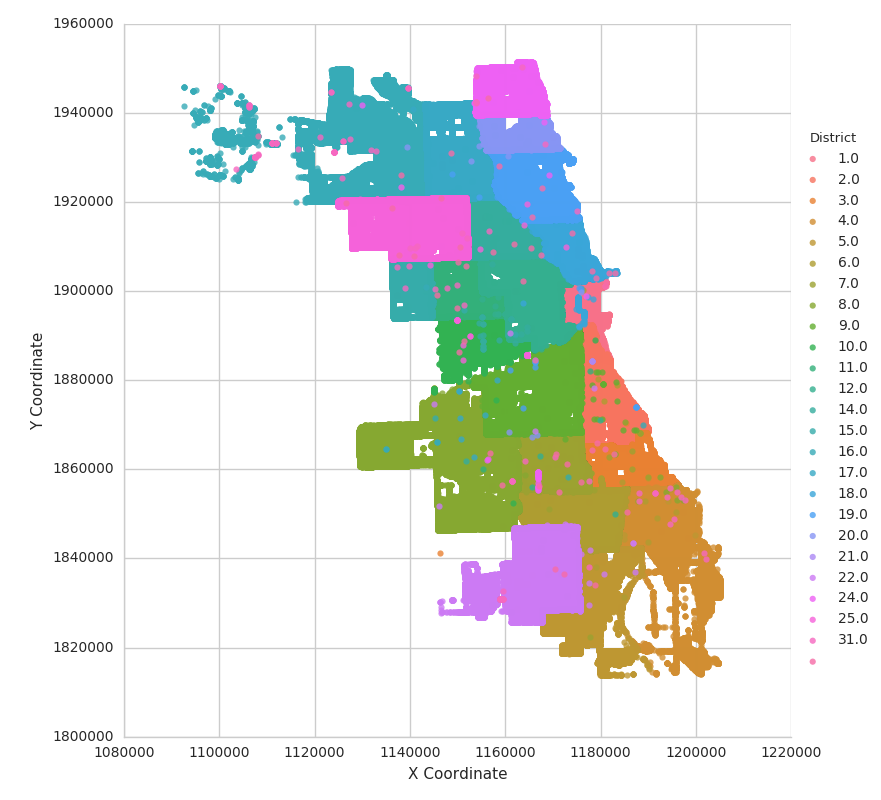

In [38]:
#data.plot(kind='scatter',x='X Coordinate', y='Y Coordinate', c='District', cmap=plt.get_cmap('jet'))
sns.lmplot( x="X Coordinate", y="Y Coordinate", data=data, fit_reg=False, hue='District', legend=True,size = 8)
sns.plt.show()
display()

The above plot nearly represents the map of chicago. We can observe there are certain spots in between the districts. This show that there is some discripancy in the data. These values can be sent to the data collector for correction.

Plotting crime locations and classifying according to Crime Type and Crime Year. The parameters CrimeType and CrimeYear can be changed to plot crimes locations.

In the example below, we have plotted THEFT crime type in year 2018

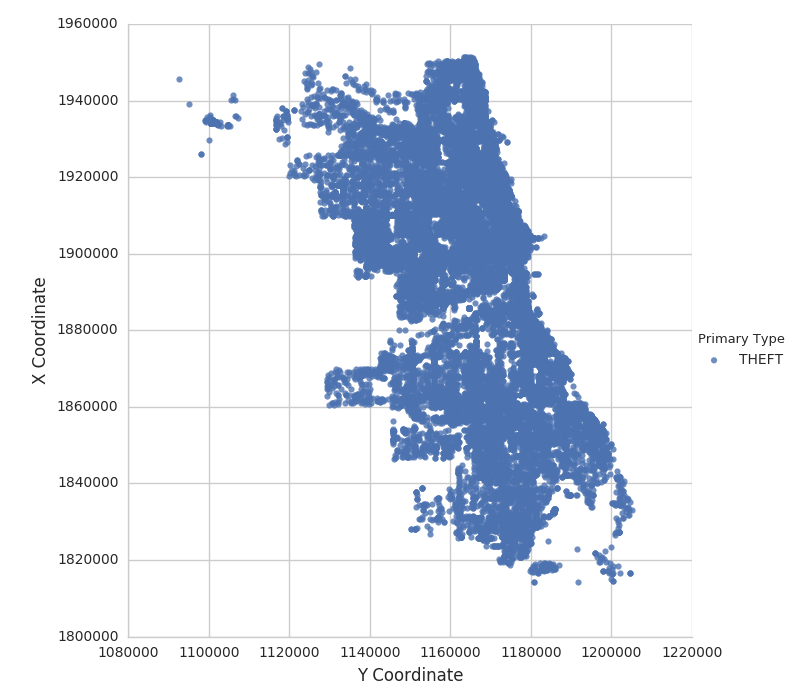

In [41]:
CrimeType = "THEFT"
CrimeYear = 2018
crime_year = data[data['Year'] == CrimeYear]
plt.figure(figsize=(12,7))
sns.lmplot(x='X Coordinate', y='Y Coordinate', size=7, hue='Primary Type', data=crime_year[crime_year['Primary Type']==CrimeType], fit_reg=False)
plt.ylabel('X Coordinate', fontsize=12)
plt.xlabel('Y Coordinate', fontsize=12)
plt.xticks(rotation = 0)
plt.show()
display()

Grouping the data according to Year and Crime type. Counting the number of Crimes per year per Type

In [43]:
df_all = dta

In [44]:
data = df_all
crime_type = data.groupby(['Year', 'Primary Type'])['ID'].count().reset_index(name = 'count')

In [45]:
da = pd.DataFrame(crime_type)

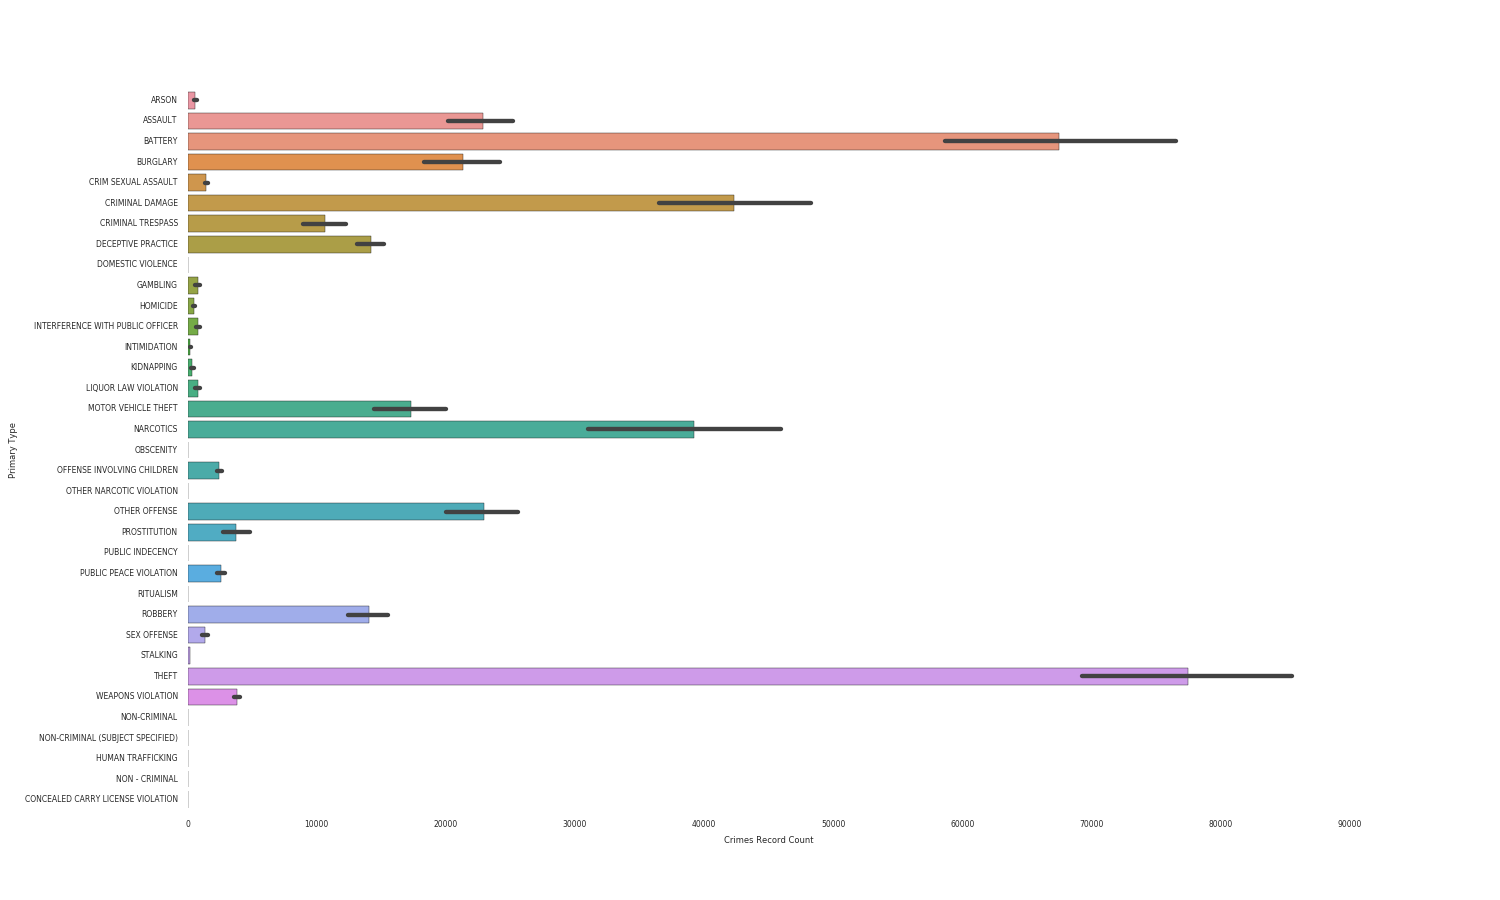

In [46]:
plt.clf()
sns.set(font_scale=0.55)
fig, ax = plt.subplots(figsize=(15,9))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.despine(left=False, bottom=True)
type_graph = sns.barplot(x='count', y='Primary Type', data=crime_type, ax=ax)
type_graph.set(ylabel="Primary Type", xlabel="Crimes Record Count")

display()

Monthly Crimes, Rolling Mean and Autocorrelation plot

In [48]:
crimes = df_all[['ID', 'Date', 'Block', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Latitude', 'Longitude']]

In [49]:
# convert dates to pandas datetime format
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)

In [50]:
loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
desc_to_change = list(crimes['Description'].value_counts()[20:].index)
#type_to_change = list(crimes['Primary Type'].value_counts()[20:].index)

crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'
#crimes.loc[crimes['Primary Type'].isin(type_to_change) , crimes.columns=='Primary Type'] = 'OTHER'

In [51]:
# we convert those 3 columns into 'Categorical' types -- works like 'factor' in R
crimes['Primary Type']         = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

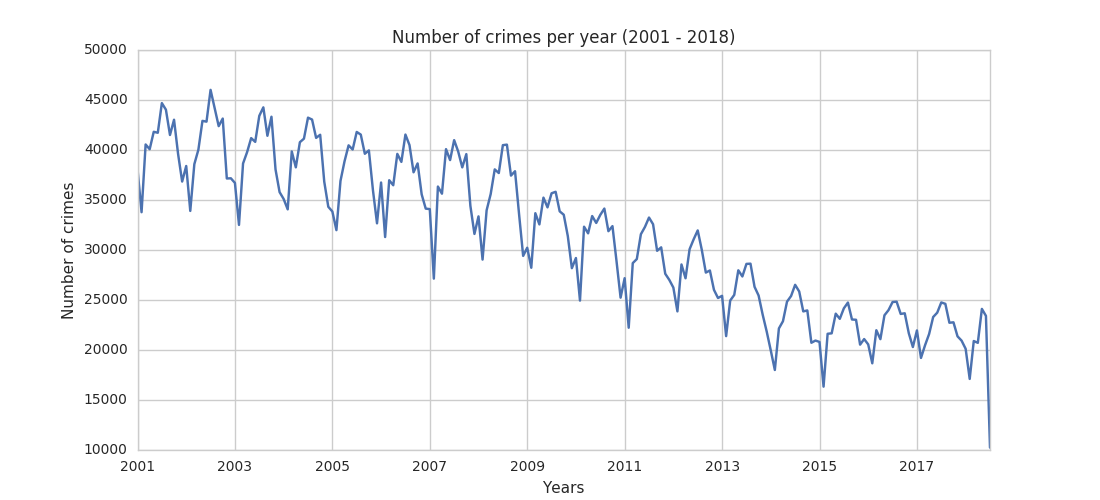

In [52]:
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Number of crimes per year (2001 - 2018)')
plt.xlabel('Years')
plt.ylabel('Number of crimes')
plt.show()
display()

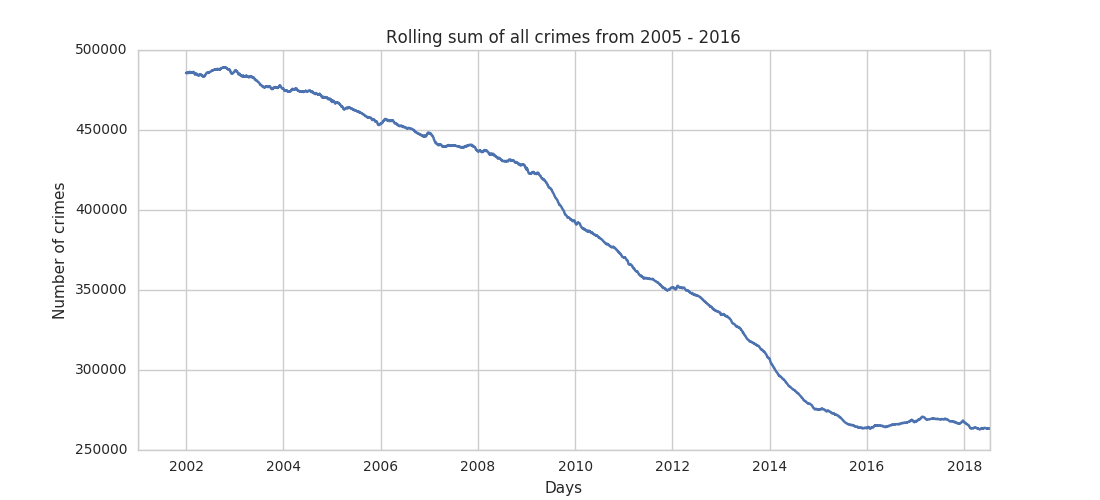

In [53]:
plt.figure(figsize=(11,5))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2005 - 2016')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()
display()

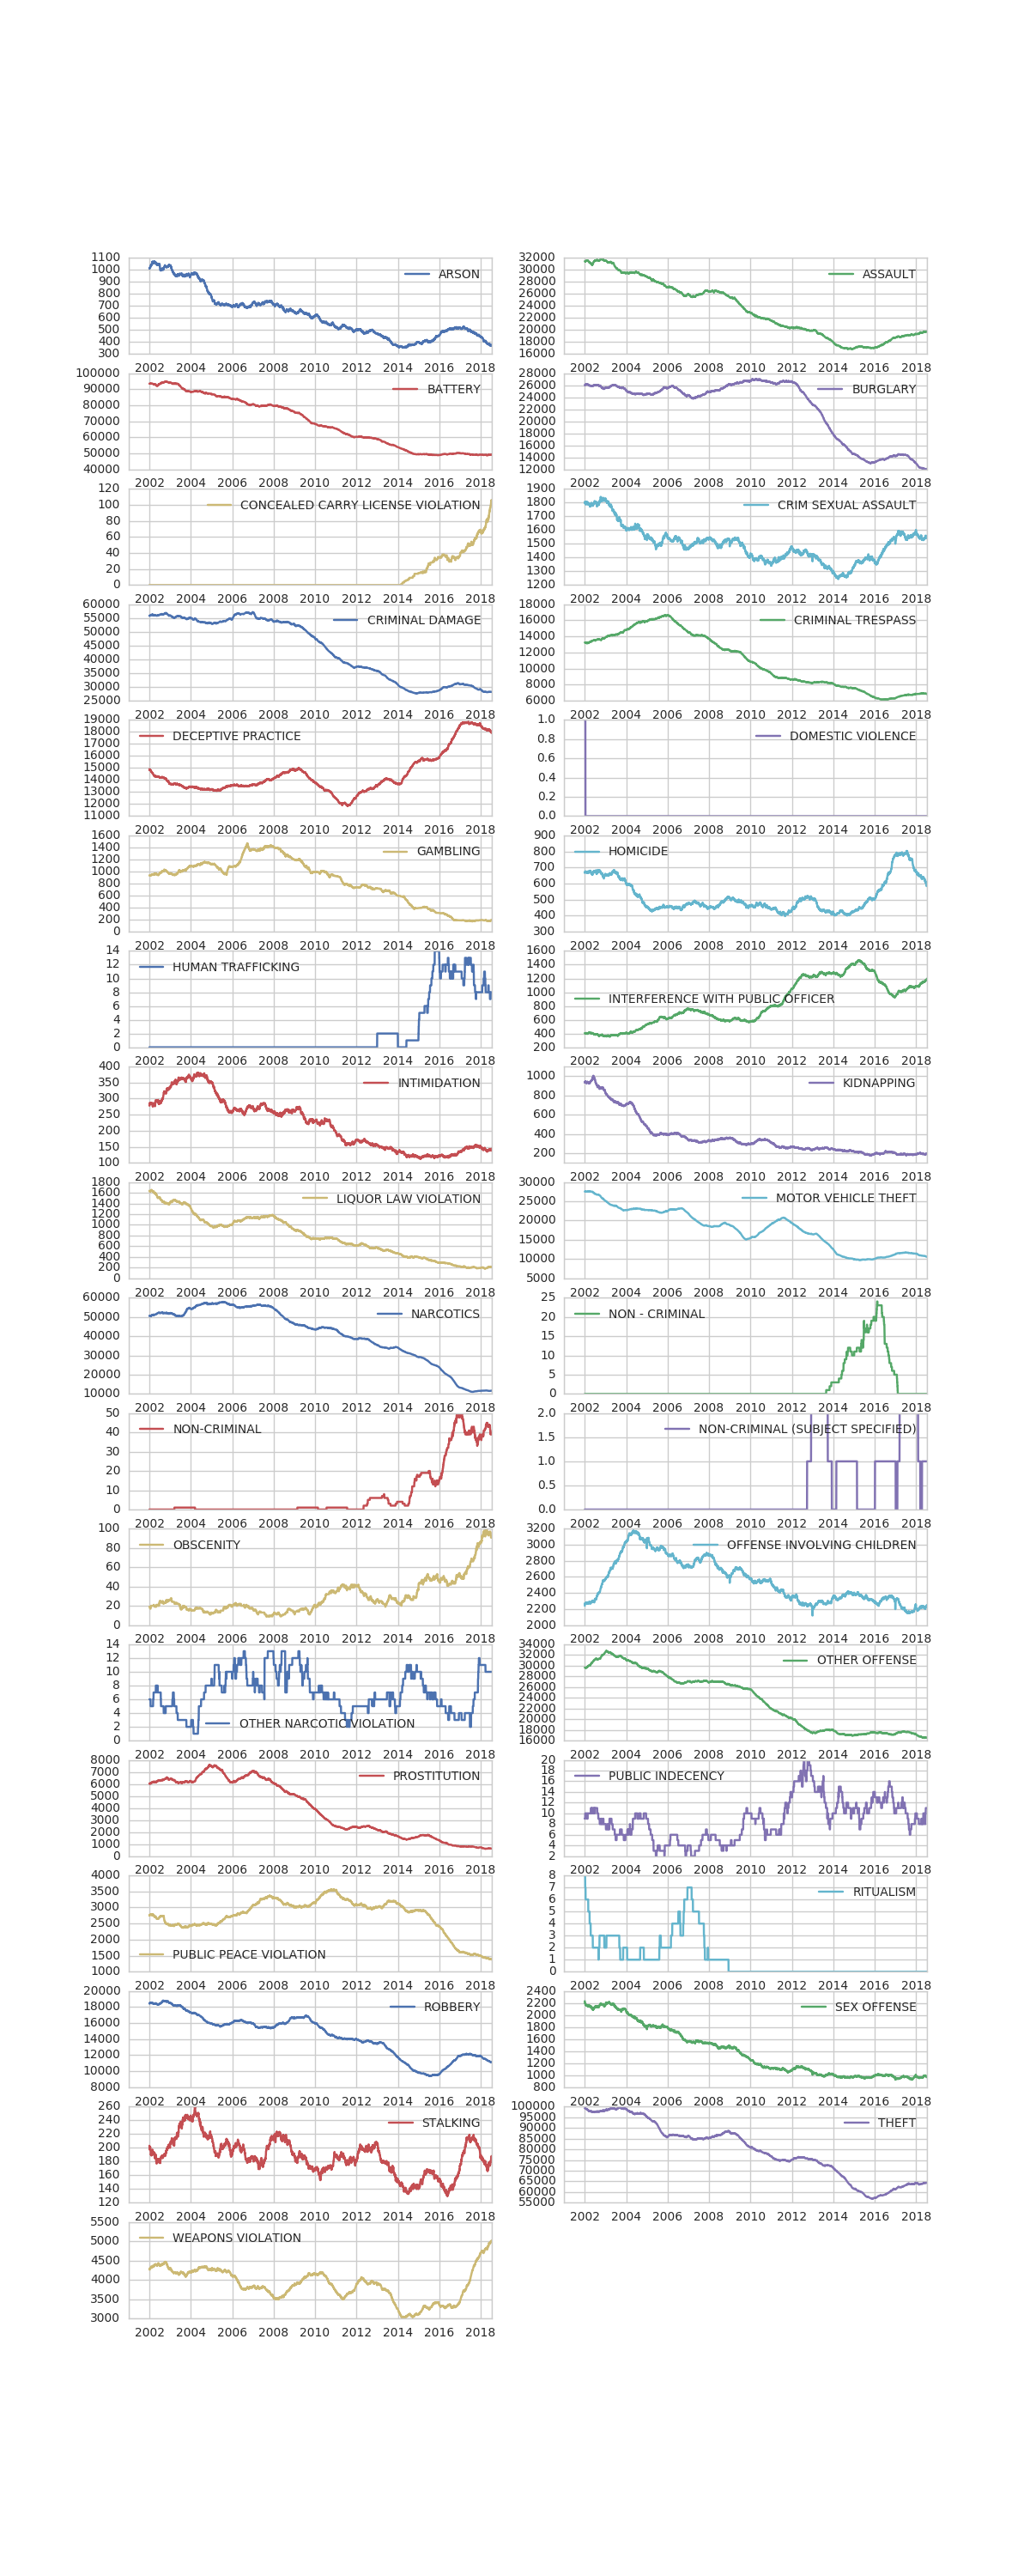

In [54]:
crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 2), sharex=False, sharey=False)
display()

In [55]:
crime_type = data.groupby(['Year', 'Primary Type'])['ID'].count().reset_index(name = 'count')
crime_type = pd.DataFrame(crime_type)

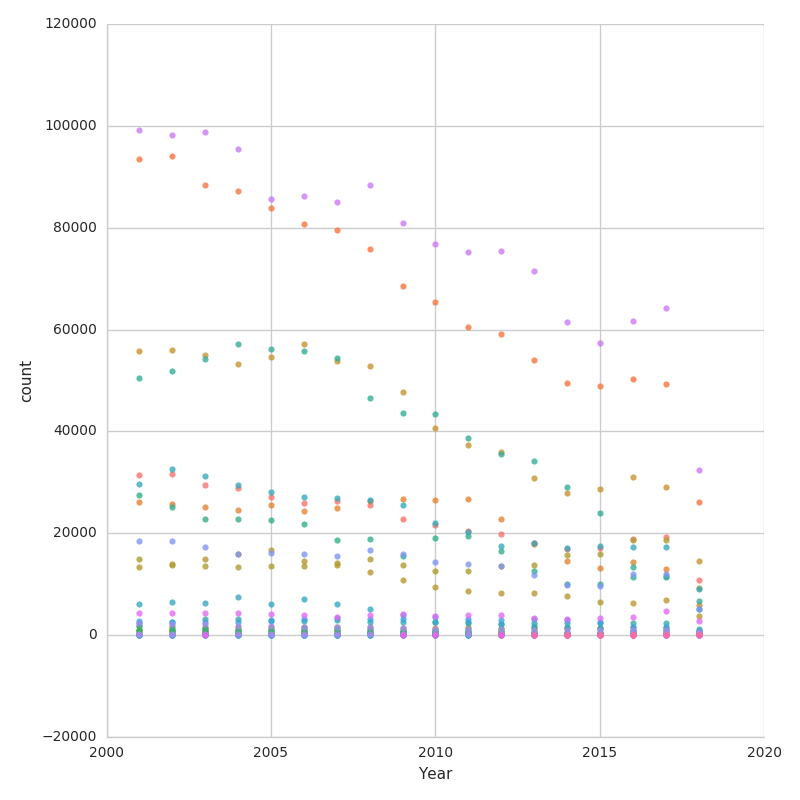

In [56]:
plt.figure(figsize=(11,4))
sns.lmplot( x="Year", y="count", data=crime_type, fit_reg=False, hue='Primary Type', legend=False,size = 8)
sns.plt.show()
display()

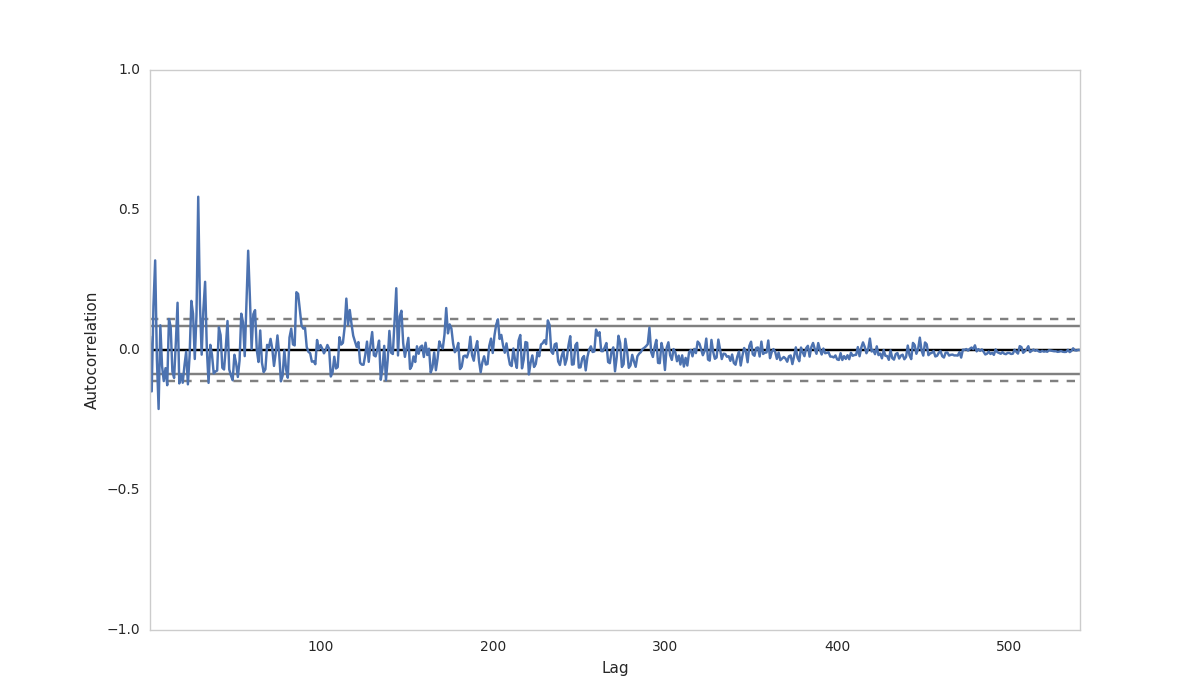

In [57]:
plt.clf()
plt.figure(figsize=(12,7))
crime_count = crime_type['count']
pd.tools.plotting.autocorrelation_plot(crime_count)
plt.show()
display()

The above autocorrelation plot shows the counts correlated with prior values to see the uniformity. 

It can be observed that the crime rate is uniform and decreasing gradually with time